In [185]:
import yfinance as yf
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [83]:
stocks = input("dinner")
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True)

dinnerNG=F
[*********************100%***********************]  1 of 1 completed


In [84]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [85]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


- When : Single variable, trying to figure out how it is distributed
- How it looks: Histogram + KDE(kernel density estimation)(Both of them are normed(sum=1))
- (norm_hist = False) : literally shows the count
- KDE?: Sum the normal distributions up and normalize it

<AxesSubplot:xlabel='Date'>

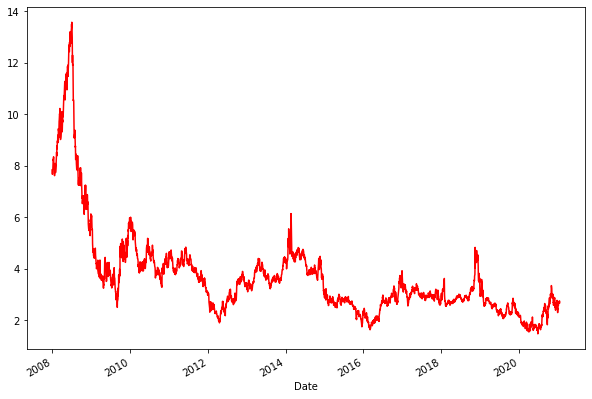

In [86]:
data.Close.plot(figsize = (10,7), color = "r")

/Users/jaredpeck/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close'>

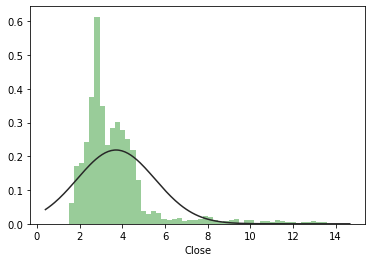

In [87]:
from scipy.stats import norm

sns.distplot(data.Close, kde = False, hist = True ,  fit = norm, color = "g")


/Users/jaredpeck/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

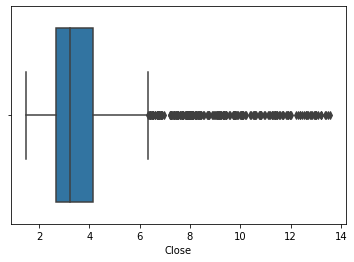

In [88]:
sns.boxplot(data["Close"])

In [89]:
# understood the shape and data distribution
# Linear Logistic SVM 

In [90]:
X = data.drop("Close", axis = 1)
y = data["Close"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)





(2625, 4)
(2625,)
(657,)
(657, 4)


In [91]:
from sklearn.linear_model import LinearRegression

In [105]:
lr = LinearRegression().fit(X_train, y_train)
pred1 =lr.predict(X_test)

In [95]:
'''
MSE
Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error
RMSE 
a metric that tells us how far apart our predicted values are from our observed values in a model, on average
r2
used to evaluate the performance of a linear regression model closer to 1 the better 
'''

In [111]:

# all for Linear Regression
# see how effective linear regression model is. 
from sklearn.metrics import mean_squared_error, r2_score


def calculate(y_test, y_pred):
    """
    y_test = y_true value,
    y_pred = predicted value 
    
    """
    mse = mean_squared_error(y_test, y_pred)
    
    rmse = np.sqrt(mse)
    rscore = r2_score(y_test, y_pred)
    print("MSE : {}".format(mse))
    print("RMSE : {}".format(rmse))
    print("RScore: {}".format(rscore))
        

In [112]:
calculate(y_test, pred1 )

MSE : 0.0015345662928849346
RMSE : 0.039173540724383525
RScore: 0.9994383299702715


In [119]:
from sklearn.linear_model import Ridge, Lasso

In [120]:
ridge = Ridge().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)

In [124]:
print(ridge.score(X_train, y_train))
print(lasso.score(X_train, y_train))

ridge_pred = ridge.predict(X_test) 
lasso_pred = lasso.predict(X_test) 



0.9994587279783269
0.9099473970111531


In [132]:

#[Ridge Predictions]
print("Ridge Regression")
calculate(y_test, ridge_pred)
print("\n")
# [ Lasso less prone to overfitting with lasso]
print("Lasso Regression")
calculate(y_test, lasso_pred)

Ridge Regression
MSE : 0.0016151026199633784
RMSE : 0.04018833935314295
RScore: 0.9994088526896652


Lasso Regression
MSE : 0.2369233626053282
RMSE : 0.4867477402159441
RScore: 0.9132831519010188


In [144]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV



In [145]:
# C, Gammma, kernal : key hyperparameters that can be used to train the most optimal SVM model using RBF kernel.
# Radial Basis Kernel is a kernel function that is used in machine learning to find a non-linear classifier or regression line.

In [163]:
svr = SVR()

params_grid = {"C": [0.1, 1, 10, 100, 1000], 
         "gamma":[1, 0.1, 0.01,0.001, 0.0001], 
        "kernel": ["rbf"] }

In [164]:
# use this with SVR()
grid = GridSearchCV(SVR(),params_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.073 total time=   0.2s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.002 total time=   0.3s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.3s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.3s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.006 total time=   0.3s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.002 total time=   0.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.005 total time=   0.3s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.004 total time=   0.3s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.003 total time=   0.3s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.004 total time=   0.3s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.012 total time=   0.3s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.002 total time=   0.3s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.008 total time=   0.3s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [166]:
grid.best_estimator_

SVR(C=100, gamma=0.01)

In [176]:
svr = SVR(C = 100, gamma = 0.01, kernel = "rbf" )
svr.fit(X_train, y_train)
svr_predict = svr.predict(X_test)
svr_predict

array([3.76365956, 3.76365956, 3.76230057, 3.76365956, 3.2466756 ,
       3.76365956, 3.81858227, 3.76365956, 3.76365956, 3.17658293,
       2.79636823, 3.69380097, 2.71633995, 3.76365956, 3.76364116,
       3.69185146, 3.76365956, 3.76365956, 3.81908664, 3.76340857,
       3.75006454, 3.76728789, 3.76365956, 2.46582133, 3.76365956,
       3.76365956, 3.76365956, 3.76599997, 3.76364381, 3.45573395,
       3.76021601, 3.76037339, 3.76365956, 3.01785505, 3.76371026,
       4.20836533, 3.76365956, 3.76365956, 3.76365956, 3.59937803,
       3.76365909, 3.22679869, 3.76070821, 3.76365956, 3.76365956,
       3.56999938, 4.91162529, 3.83622722, 3.78160499, 3.76367566,
       3.76364215, 3.76365956, 3.74574911, 3.76365956, 3.76367553,
       3.76365956, 3.76365956, 3.7438875 , 3.76365956, 3.76365956,
       3.76365956, 2.9172196 , 2.90586322, 3.72944245, 3.76365956,
       3.75976092, 3.76365956, 3.76088009, 3.76365956, 3.76365956,
       3.76365958, 3.76101071, 4.04959858, 3.76365956, 3.76352

In [184]:
import joblib

joblib.dump(ridge,"model.pkl")
ridge_from_joblib = model = joblib.load("model.pkl")


In [186]:
# conclusion the best way to predict the values was with Ridge Regression.
